## ICE-7. MPEG-7 Color Layout Descriptor
Please download the images from the following link:<br>
https://drive.google.com/file/d/1h0JFzpyc7zNZiln5Ls74CfvOfhtl51XK/view?usp=sharing <br><br>
Please refer to the following link for the code of Color Layout Descriptor: <br>
https://github.com/scferrada/imgpedia

## Task 1. Please using the given code to extract the color layout features from the downloaded image 001.jpg, and display it.

In [1]:
# write you code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the required libraries
import cv2, sys, os
import numpy as np

# Create an array to store average colors
averages = np.zeros((8, 8, 3))

# Read the input image
img = cv2.imread(r'/content/drive/MyDrive/ICE-7_data/ICE-7_data/001.jpg')

# Get the dimensions of the image
imgH, imgW, _ = img.shape

# Divide the image into 8x8 slices
for row in range(8):
    for col in range(8):
        # Extract the current slice
        slice = img[imgH // 8 * row: imgH // 8 * (row + 1), imgW // 8 * col: imgW // 8 * (col + 1)]

        # Calculate the average color of the slice
        average_color_per_row = np.mean(slice, axis=0)
        average_color = np.mean(average_color_per_row, axis=0)
        average_color = np.uint8(average_color)

        # Store the average color in the array
        averages[row][col][0] = average_color[0]
        averages[row][col][1] = average_color[1]
        averages[row][col][2] = average_color[2]

# Convert the average color array to YCrCb color space
icon = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)

# Split the YCrCb image into Y, Cr, and Cb channels
y, cr, cb = cv2.split(icon)

# Apply Discrete Cosine Transform (DCT) to Y, Cr, and Cb channels
dct_y = cv2.dct(np.float32(y))
dct_cb = cv2.dct(np.float32(cb))
dct_cr = cv2.dct(np.float32(cr))

# Perform zigzag scanning on DCT coefficients
dct_y_zigzag = []
dct_cb_zigzag = []
dct_cr_zigzag = []
flip = True
flipped_dct_y = np.fliplr(dct_y)
flipped_dct_cb = np.fliplr(dct_cb)
flipped_dct_cr = np.fliplr(dct_cr)

for i in range(8 + 8 - 1):
    k_diag = 8 - 1 - i
    diag_y = np.diag(flipped_dct_y, k=k_diag)
    diag_cb = np.diag(flipped_dct_cb, k=k_diag)
    diag_cr = np.diag(flipped_dct_cr, k=k_diag)

    if flip:
        diag_y = diag_y[::-1]
        diag_cb = diag_cb[::-1]
        diag_cr = diag_cr[::-1]

    dct_y_zigzag.append(diag_y)
    dct_cb_zigzag.append(diag_cb)
    dct_cr_zigzag.append(diag_cr)
    flip = not flip

# Concatenate the zigzag scanned DCT coefficients
array = np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])

# Display the resulting array
array


array([ 7.54875000e+02, -3.71453323e+01, -2.75390893e-01, -2.05506821e+02,
        7.78468102e-02, -2.34176540e+01, -3.93178177e+01,  3.43435440e+01,
        2.75409832e+01, -5.34272051e+00, -4.38750000e+01,  5.65796041e+00,
        2.59727240e+00, -2.54444008e+01, -1.43750000e+01, -2.34878922e+01,
        2.55022869e+01,  2.20043163e+01, -3.80048065e+01, -5.47946072e+00,
        6.65629059e-02,  5.35990372e+01, -1.31532040e+01,  2.22179368e-01,
        4.08514328e+01, -2.71923709e+00, -2.33335533e+01, -7.21246767e+00,
       -2.86610723e+00,  1.22206163e+01,  3.80418777e+00, -3.12251759e+01,
        3.03049412e+01,  1.38942504e+00,  7.60543251e+00,  1.85286961e+01,
        1.82548904e+01, -2.60280678e-03, -1.26275692e+01,  2.58750000e+01,
        2.63148155e+01, -3.00260210e+00, -2.30272079e+00, -2.49541059e-01,
       -1.75480080e+01,  2.62883568e+01,  8.04879284e+00, -2.93222847e+01,
        1.81053467e+01, -1.63744450e+01, -1.93038082e+01,  1.69019365e+00,
        8.70240688e+00,  

## Task 2. Retrieve the image that is the most similar to image 001.jpg from the downloaded images (not itself).
Please try to use at least three different metrics to measure the distance between color layout descriptors (L1 distance, L2 distance, earth mover's distance, etc)

In [4]:
# write you code here

import os

# Change the current working directory to the specified path
os.chdir('/content/drive/MyDrive/ICE-7_data/ICE-7_data/')

# Get the list of files in the current directory
path = os.listdir()

# Create an empty list to store the image filenames
images = []

# Iterate over each file in the directory
for i in path:
    images.append(i)

# Print the current working directory
print(os.getcwd())

# Remove the '001.jpg' file from the list of images
images.remove('001.jpg')

# Display the updated list of image filenames
images


/content/drive/MyDrive/ICE-7_data/ICE-7_data


['004.jpg',
 '003.jpg',
 '005.jpg',
 '002.jpg',
 '011.jpg',
 '014.jpg',
 '007.jpg',
 '013.jpg',
 '008.jpg',
 '015.jpg',
 '006.jpg',
 '010.jpg',
 '012.jpg',
 '016.jpg',
 '017.jpg',
 '009.jpg']

In [5]:
from math import sqrt
from scipy import spatial
from scipy.spatial import distance
import numpy as np
from scipy.stats import wasserstein_distance
from sklearn.metrics.pairwise import cosine_similarity

# Set the path to the directory containing the images
path = "/content/drive/MyDrive/ICE-7_data/ICE-7_data"

# Get the list of entries (files and directories) in the specified path
entries = os.listdir()

# Create an empty list to store the image data
dat = []

# Iterate over each entry in the directory
for entry in entries:
    # Create the complete path to the image file
    pat = path + '/' + entry

    # Read the image
    da = cv2.imread(pat)

    # Append the image data to the list
    dat.append(da)

# Create empty lists to store the calculated distances
array = [0] * len(dat)
icon = [0] * len(dat)
l1dist = [0] * len(dat)
l2dist = [0] * len(dat)
emd = [0] * len(dat)

# Iterate over each image in the list
for m in range(0, len(dat)):
    # Initialize an array to store average colors
    averages = np.zeros((8, 8, 3))

    # Get the current image
    img = dat[m]

    # Get the dimensions of the image
    imgH, imgW, _ = img.shape

    # Divide the image into 8x8 slices and calculate average colors
    for row in range(8):
        for col in range(8):
            slice = img[imgH // 8 * row: imgH // 8 * (row + 1), imgW // 8 * col: imgW // 8 * (col + 1)]
            average_color_per_row = np.mean(slice, axis=0)
            average_color = np.mean(average_color_per_row, axis=0)
            average_color = np.uint8(average_color)
            averages[row][col][0] = average_color[0]
            averages[row][col][1] = average_color[1]
            averages[row][col][2] = average_color[2]

        # Convert the average color array to YCrCb color space
        icon[m] = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)

    # Split the YCrCb image into Y, Cr, and Cb channels
    y, cr, cb = cv2.split(icon[m])

    # Apply Discrete Cosine Transform (DCT) to Y, Cr, and Cb channels
    dct_y = cv2.dct(np.float32(y))
    dct_cb = cv2.dct(np.float32(cb))
    dct_cr = cv2.dct(np.float32(cr))

    # Perform zigzag scanning on DCT coefficients
    dct_y_zigzag = []
    dct_cb_zigzag = []
    dct_cr_zigzag = []
    flip = True
    flipped_dct_y = np.fliplr(dct_y)
    flipped_dct_cb = np.fliplr(dct_cb)
    flipped_dct_cr = np.fliplr(dct_cr)

    for i in range(8 + 8 - 1):
        k_diag = 8 - 1 - i
        diag_y = np.diag(flipped_dct_y, k=k_diag)
        diag_cb = np.diag(flipped_dct_cb, k=k_diag)
        diag_cr = np.diag(flipped_dct_cr, k=k_diag)

        if flip:
            diag_y = diag_y[::-1]
            diag_cb = diag_cb[::-1]
            diag_cr = diag_cr[::-1]

        dct_y_zigzag.append(diag_y)
        dct_cb_zigzag.append(diag_cb)
        dct_cr_zigzag.append(diag_cr)
        flip = not flip

    # Concatenate the zigzag scanned DCT coefficients
    array[m] = np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])

    # Calculate the L1 distance between the current image and the reference image (array[0])
    l1dist[m] = np.linalg.norm(array[0] - array[m], ord=1)

    # Calculate the L2 distance between the current image and the reference image (array[0])
    l2dist[m] = np.linalg.norm(array[0] - array[m], ord=2)

    # Calculate the Earth Mover's distance between the current image and the reference image (array[0])
    emd[m] = sum(abs(array[0] - array[m])) / (len(dat) - 1)

# Print the calculated distances
print("\nUsing L1-DISTANCE: ", l1dist)
print("\nUsing L2-DISTANCE: ", l2dist)
print("\nUsing Earth Mover's DISTANCE: ", emd)



Using L1-DISTANCE:  [0.0, 3270.5764, 3885.7505, 4138.3555, 3414.1968, 3869.8684, 3911.4028, 3897.7488, 3805.1208, 4137.3213, 3910.3828, 3218.9116, 3634.281, 4443.1826, 4668.957, 3809.6616, 4714.6167]

Using L2-DISTANCE:  [0.0, 383.69128, 798.213, 599.48816, 513.87933, 560.43555, 716.0182, 519.58154, 662.55035, 664.21387, 624.8512, 455.98358, 543.52094, 1070.461, 661.23065, 686.64844, 724.64886]

Using Earth Mover's DISTANCE:  [0.0, 204.41103096678853, 242.85941885225475, 258.64721602760255, 213.38729384541512, 241.8667682837695, 244.46268399711698, 243.6092962678522, 237.82004299759865, 258.58257388323545, 244.39894307404757, 201.18198464252055, 227.14255841821432, 277.69891587039456, 291.8097866997123, 238.10383516177535, 294.6635454669595]


## Question 1. Please answer if the outputs of Task 2 are the same. If the outputs are different, based on your perspective, which metrics gives the most similar retrieval? If the outputs are the same, do you think we can use any metrics to compare the color layout features in any cases? Give an explanation to your answer.

**Answer to Q1**:




---

## (Tutorial) Convolutional filter
Please review the following article for further understanding of Convolutional layer in Convolutional Neural Network
https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ <br>
Please download the image from the following link for the your program <br>
https://drive.google.com/file/d/1MSQ8e0nxoBIkcp5sdo8Vd-65b9okx6hX/view?usp=sharing

* use pip install opencv-python to install cv2

## Example. Convolutional filter

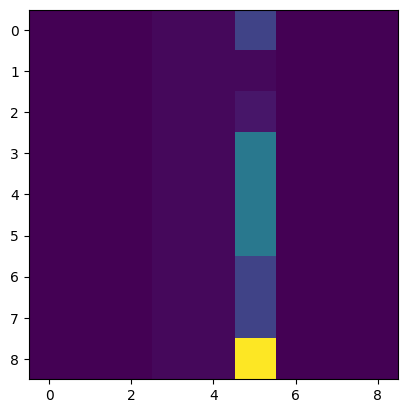

[[  0   0   0   5   0  77   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0 134   0   0   0]
 [  0   0   0   3   0 117   0   0   0]
 [  0   0   0   3   0 127   0   0   0]
 [  0   0   0   3   0  47   0   0   0]
 [  0   0   0   3   0  17   0   0   0]
 [  0   0   0   5   0 255   0   0   0]]


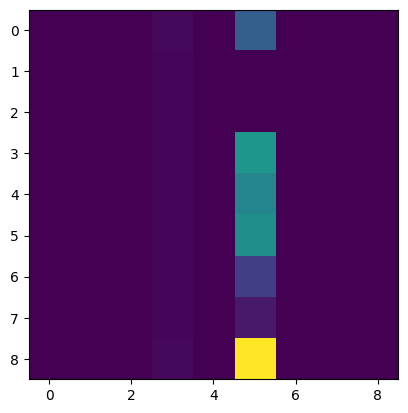

In [18]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil = np.array([[ -1, -1, -1],
                [ -1, 8, -1],
                [ -1, -1, -1]])
#use filter2D to apply convolution
res = cv2.filter2D(data,-1,fil, borderType=cv2.BORDER_CONSTANT)
print(res)

plt.imshow(res)
pylab.show()

## Task 3. Building three different kernels for different purposes, and commenting the purpose of each kernel
For instance, the kernel in the example is using for edge extraction

# 3.1 Sharpen Kernel

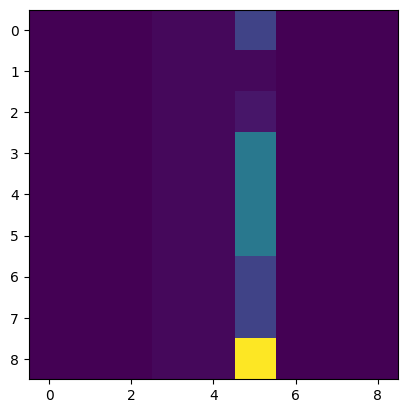

[[  0   0   0   3   0  48   0   0   0]
 [  0   0   0   2   1   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   2   0  76   0   0   0]
 [  0   0   0   2   0  59   0   0   0]
 [  0   0   0   2   0  69   0   0   0]
 [  0   0   0   2   0  19   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   3   0 239   0   0   0]]


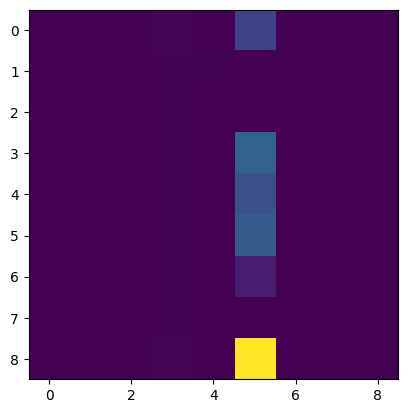

In [7]:
# write your code here

import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil1 = np.array([[ 0, -1, 0],
                [ -1, 5, -1],
                [ 0, -1, 0]])
#use filter2D to apply convolution
res1 = cv2.filter2D(data,-1,fil1, borderType=cv2.BORDER_CONSTANT)
print(res1)

plt.imshow(res1)
pylab.show()

# 3.2 The emboss kernel

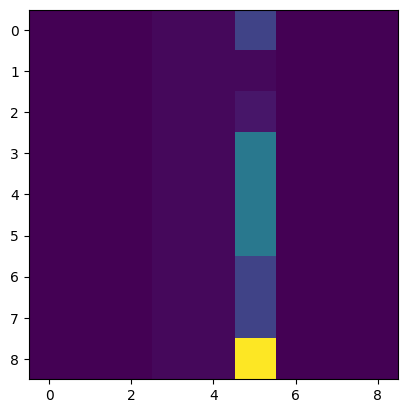

[[  0   0   3   5  13  10   0   0   0]
 [  0   0   3   4   5   0   0   0   0]
 [  0   0   3   4  41  19   0   0   0]
 [  0   0   3   4  58  34   0   0   0]
 [  0   0   3   4  58  17   0   0   0]
 [  0   0   3   4  38   7   0   0   0]
 [  0   0   3   4  28   0   0   0   0]
 [  0   0   3   4 108  47   0   0   0]
 [  0   0   1   1  47  37   0   0   0]]


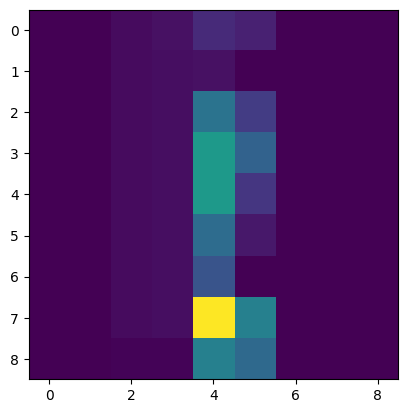

In [8]:
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil2 = np.array([[ -2, -1, 0],
                [ -1, 1, 1],
                [ 0, 1, 2]])

#use filter2D to apply convolution
res2 = cv2.filter2D(data,-1,fil2, borderType=cv2.BORDER_CONSTANT)
print(res2)

plt.imshow(res2)
pylab.show()

# 3.3 The Top Sabol Kernel :

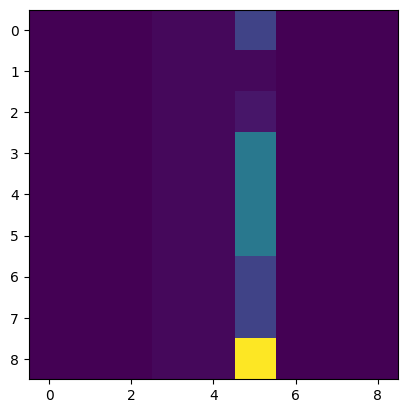

[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 14  7  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 20 10  0  0]
 [ 0  0  0  0 10 20 10  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 13 21 10  0  0]]


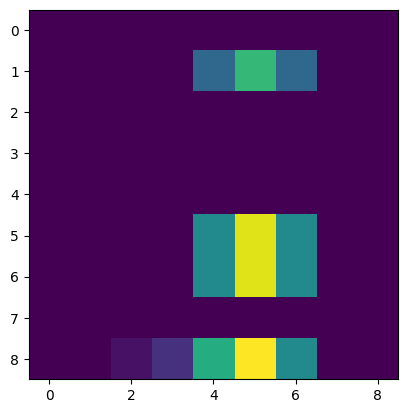

In [9]:
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil3 = np.array([[ 1, 2, 1],
                [ 0, 0, 0],
                [ -1, -2, -1]])

#use filter2D to apply convolution
res3 = cv2.filter2D(data,-1,fil3, borderType=cv2.BORDER_CONSTANT)
print(res3)

plt.imshow(res3)
pylab.show()

## Task 4. Refer to the multiple channels section in the tutorial material, apply the three kernels you built in task 1 to the downloaded image. Visualize the feature maps produced by the three kernels. Combine the three feature maps to a 3-channels feature map and visualize it.

<class 'numpy.ndarray'>
(360, 480, 3)
[[[  0   1   0]
  [  0   1   0]
  [  0   0   0]
  ...
  [  9  17  16]
  [ 13  16  14]
  [ 54  55  51]]

 [[  0   1   0]
  [  0   1   0]
  [  0   0   0]
  ...
  [  8  16  15]
  [  7  10   8]
  [ 35  36  32]]

 [[  0   1   0]
  [  0   1   0]
  [  0   0   0]
  ...
  [  6  12  11]
  [  3   4   2]
  [ 15  14  10]]

 ...

 [[ 87 108 136]
  [ 87 108 136]
  [ 88 109 137]
  ...
  [ 96 116 141]
  [ 97 117 142]
  [ 97 117 142]]

 [[ 89 110 138]
  [ 89 110 138]
  [ 89 110 138]
  ...
  [ 84 104 129]
  [ 83 103 128]
  [ 81 101 126]]

 [[ 89 110 138]
  [ 89 110 138]
  [ 89 110 138]
  ...
  [104 124 149]
  [103 123 148]
  [100 120 145]]]


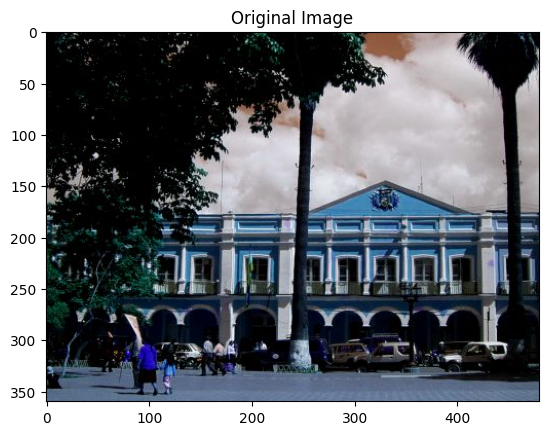

In [11]:
# write your code here

# import required libraries

import cv2
import matplotlib.pyplot as plt
import pylab
import numpy as np
from PIL import Image
from numpy import asarray

# write your code here

originalImage = cv2.imread(r'/content/1.jpg')

# convert image to numpy array
originalData = asarray(originalImage)
print(type(originalData))

# summarize shape and print the data
print(originalData.shape)
print(originalData)

# Display the original image

plt.title("Original Image")
plt.imshow(originalImage)

In [12]:
import cv2
from PIL import Image
from matplotlib import pyplot

def load_image(image_path):
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return grey_image

def convolve2d(image, kernel):

    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output


# 4.1 The Sharpen Kernel

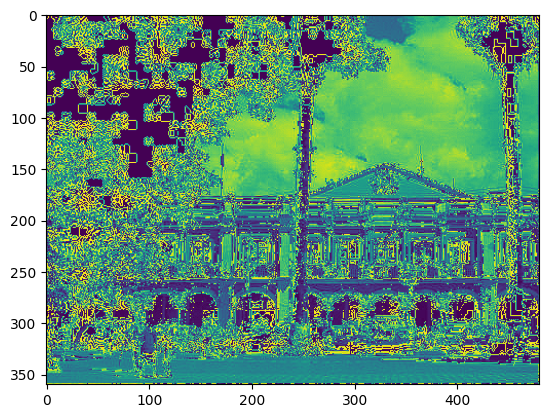

In [21]:
input_image = load_image('/content/1.jpg')

# kernel to be used to get sharpened image
KERNEL1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL1)

plt.imshow(image_sharpen)
pylab.show()

# 4.2 The emboss kernel

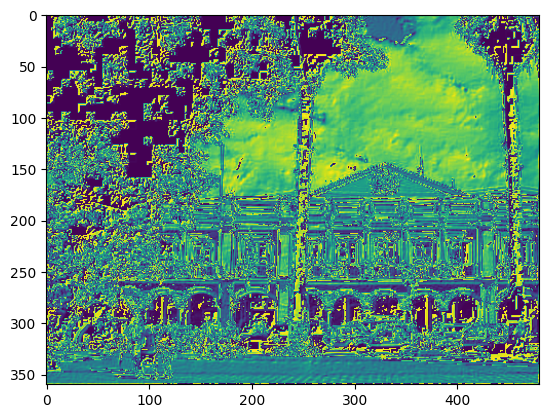

In [22]:
# kernel to find depth by emphasizing the differences of pixels

KERNEL2 = np.array([[ -2, -1, 0],[ -1, 1, 1],[ 0, 1, 2]])
image_emboss = convolve2d(input_image, kernel=KERNEL2)

plt.imshow(image_emboss)
pylab.show()

# 4.3 The Top Sobel Kernel

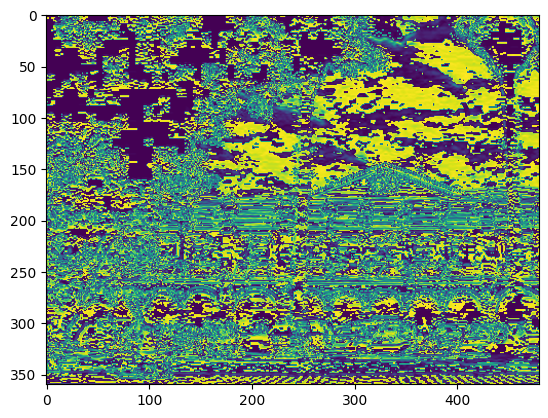

In [24]:

# kernel to be used to show differences in adjacent pixels

KERNEL3 = np.array([[ 1, 2, 1],[ 0, 0, 0],[ -1, -2, -1]])
image_Sobel = convolve2d(input_image, kernel=KERNEL3)

plt.imshow(image_Sobel)
pylab.show()


In [25]:
def featuremap(originalImage, sharpenImage, embossImage, sobelImage):
    pyplot.figure(figsize=(16, 8))
    # Subplot all the above kernel outputs
    ax = pyplot.subplot(1, 4, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("input image")
    # plot filter channel in grayscale
    pyplot.imshow(originalImage)
    ax = pyplot.subplot(1, 4, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Sharpen Kernel')
    # plot filter channel in grayscale
    pyplot.imshow(sharpenImage)
    ax = pyplot.subplot(1, 4, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Emboss Kernel')
    # plot filter channel in grayscale
    pyplot.imshow(embossImage)
    ax = pyplot.subplot(1, 4, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Top Sobel Kernel')
    # plot filter channel in grayscale
    pyplot.imshow(sobelImage)
    pyplot.show()

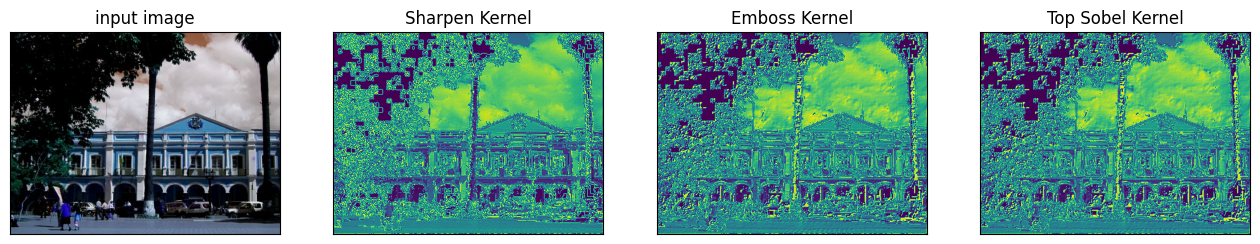

In [27]:
featuremap(originalImage, image_sharpen, image_emboss, image_emboss)

## Task 5. Refer to the multiple layers section in the tutorial material, repeatly apply the three kernels to the combined feature map that created by the previous round two times. Visualize the feature maps produced in the process

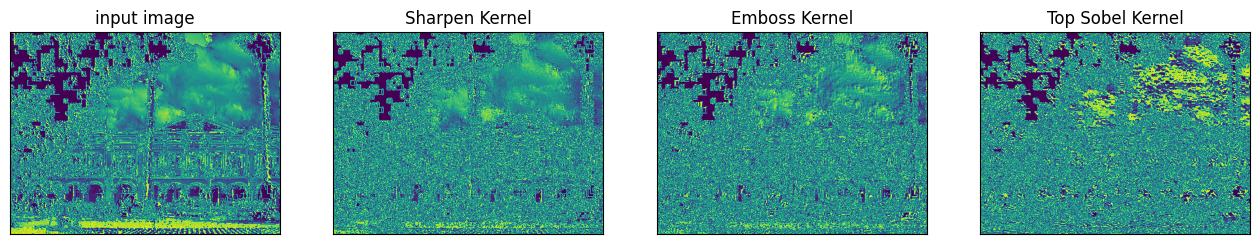

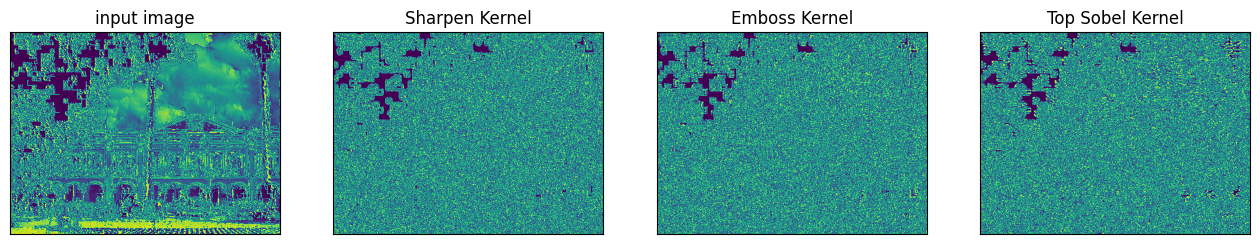

In [26]:
# write your code here

# Define the combined feature map as the input for the next round
input_image = image_sharpen + image_emboss + image_Sobel

# First round
output1_sharpen = convolve2d(input_image, kernel=KERNEL1)
output1_emboss = convolve2d(input_image, kernel=KERNEL2)
output1_sobel = convolve2d(input_image, kernel=KERNEL3)

# Second round
output2_sharpen = convolve2d(output1_sharpen, kernel=KERNEL1)
output2_emboss = convolve2d(output1_emboss, kernel=KERNEL2)
output2_sobel = convolve2d(output1_sobel, kernel=KERNEL3)

# Visualize the feature maps produced in the process
featuremap(input_image, output1_sharpen, output1_emboss, output1_sobel)
featuremap(input_image, output2_sharpen, output2_emboss, output2_sobel)

